In [2]:
"""
Time series Data analysis and Modelling :

EMWA

1. Seasonality, Trends, Cyclic, stationary
2. Autoregressive methods : (ACF)
   Moving average methods : (PACF)
		Weighted moving average
		Exponential weighted moving averages
   Arma models
   Arima models
   Sarima models
   Sarimax models
   Narima models
3. Machine learning models
4. Deep learning models 
5. AutoML for Time-series


Encoder-Decoder Sequence-to-Sequence Architectures

Sequence modelling, unfolding computational graphs
Recurrent Neural Networks(RNN)       : RNN, Bidirectional RNN, Encoder-Decoder Sequence-to-Sequence Architectures
Recursive Neural Networks(ReNN)      :
Deep Recurrent Neural Networks(DRNN) :
Challenge of long term dependencies
Echo state networks
LSTM, GRU(Gated Recuurent Neural Network unit)
"""

'\nTime series Data analysis and Modelling :\n\nEMWA\n\n1. Seasonality, Trends, Cyclic, stationary\n2. Autoregressive methods : (ACF)\n   Moving average methods : (PACF)\n\t\tWeighted moving average\n\t\tExponential weighted moving averages\n   Arma models\n   Arima models\n   Sarima models\n   Sarimax models\n   Narima models\n3. Machine learning models\n4. Deep learning models \n5. AutoML for Time-series\n\n\nEncoder-Decoder Sequence-to-Sequence Architectures\n\nSequence modelling, unfolding computational graphs\nRecurrent Neural Networks(RNN)       : RNN, Bidirectional RNN, Encoder-Decoder Sequence-to-Sequence Architectures\nRecursive Neural Networks(ReNN)      :\nDeep Recurrent Neural Networks(DRNN) :\nChallenge of long term dependencies\nEcho state networks\nLSTM, GRU(Gated Recuurent Neural Network unit)\n'

## Seasonality
Seasonality refers to regular patterns or fluctuations that occur at fixed intervals, such as:
1. **Daily cycles** (e.g., morning, afternoon, evening)
2. **Weekly cycles** (e.g., weekdays, weekends)
3. **Monthly cycles** (e.g., beginning, middle, end of month)
4. **Quarterly cycles** (e.g., seasonal changes)
5. **Yearly cycles** (e.g., holidays, summer/winter)

## Trends
Trends refer to a long-term pattern or direction in the data, where the values tend to increase or decrease over time.  
Trends can be:
- **Upward** (increasing)
- **Downward** (decreasing)
- **Linear** (straight line)
- **Non-linear** (curved)

## Stationary
A time series is considered stationary if it has:
1. Constant **mean**
2. Constant **variance**
3. No **seasonality**
4. No **trends**

## Cycles
- **Cycles** refer to long-term, repeating patterns (typically lasting more than 1 year) driven by economic or business factors.
- Cycles have **irregular durations**, unlike seasonality, which has fixed periods.
- Examples include **economic boom and recession cycles**.


In [3]:
# https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [4]:
import pandas as pd
from datetime import datetime

In [5]:
! pip install -q yfinance

In [6]:
import yfinance as yf
import pandas as pd

# Fetch Tesla stock data
df = yf.download('TSLA')

# Display the shape of the DataFrame
print("DataFrame Shape:", df.shape)

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

[*********************100%***********************]  1 of 1 completed

DataFrame Shape: (3677, 5)

First 5 rows of the DataFrame:
Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3677 entries, 2010-06-29 to 2025-02-07
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3677 non-null   float64
 1   (High, TSLA)    3677 non-null   float64
 2   (Low, TSLA)     3677 non-null   float64
 3   (Open, TSLA)    3677 non-null   float64
 4   (Volume, TSLA)  3677 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 172.4 KB


<Axes: xlabel='Date'>

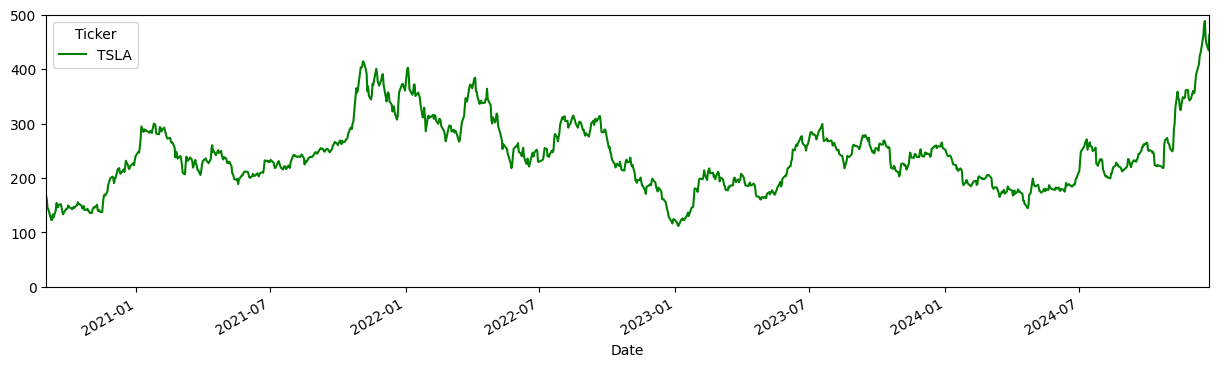

In [8]:
# df.plot()
# df['Volume'].plot(figsize=(15,4))
df['High'].plot(xlim=['2020-09','2024-12-23'],ylim=[0, 500], figsize=(15, 4), c='green')


| **Type of Moving Average**      | **Description**                                                                 |
|----------------------------------|---------------------------------------------------------------------------------|
| **Simple Moving Average (SMA)** | Calculates the average of a specified window size of previous values, including the current row, with at least **'min_periods'** data points for a valid result. |
| **Cumulative Moving Average (CMA)** | Calculates the average of all values up to the current point, giving more weight to recent values. |
| **Weighted Moving Average (WMA)** | Assigns more weight to recent data points, decreasing weights for older points. |
| **Exponential Moving Average (EMA)** | Uses an exponential decay formula to weight recent data points more heavily.     |
| **Triangular Moving Average (TMA)** | A double-smoothed moving average, emphasizing the middle values of the window.  |
| **Variable Moving Average (VMA)** | Adjusts the window size dynamically based on data volatility or trends.         |
| **Hull Moving Average (HMA)**    | Reduces lag by applying weighted averaging and smoothing techniques.            |
| **Smoothed Moving Average (SMMA)** | A long-term average that reduces noise by spreading the influence of individual data points. |


#### Simple  Moving Average

In [9]:
import yfinance as yf
import pandas as pd

# Fetch Tesla stock data
df = yf.download('TSLA')

# Add a new column with the rolling mean of the 'High' column (window size of 2)
df['high_rolling'] = df['High'].rolling(window=2).mean()

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,high_rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,1.847334
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,1.878000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,1.634000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,1.436666


<Axes: title={'center': 'High Prices with Rolling Means'}, xlabel='Date'>

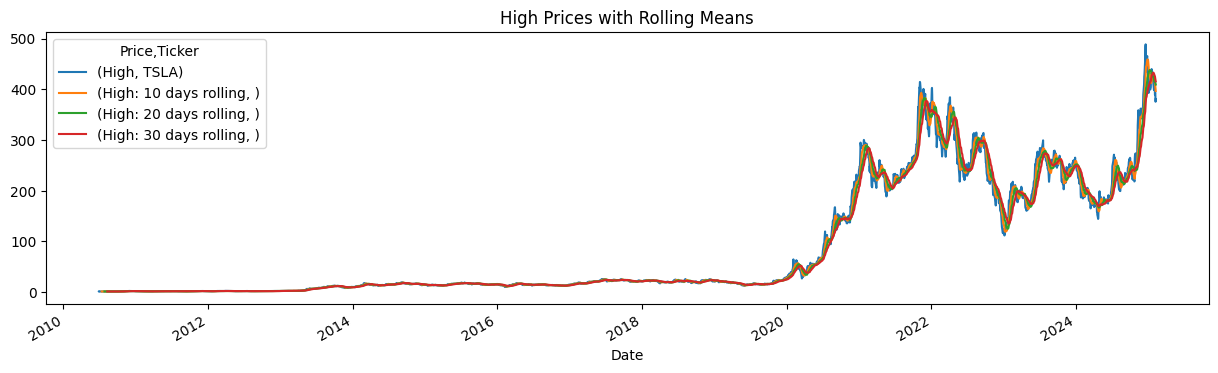

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling means
df['High: 10 days rolling'] = df['High'].rolling(window=10).mean()
df['High: 20 days rolling'] = df['High'].rolling(window=20).mean()
df['High: 30 days rolling'] = df['High'].rolling(window=30).mean()

# Plot the original 'High' and rolling means
df[['High', 'High: 10 days rolling', 'High: 20 days rolling', 'High: 30 days rolling']].plot(
    figsize=(15, 4), title='High Prices with Rolling Means'
)

#### Cummulative  Moving Average